In [3]:
# Info: For this notebook to work, 
# create a link in the notebook directory that leads to the RCEMIP/data/A-Statistics/0D directory

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
# read in csv file with the data from the large-scale models:
import pandas as pd
import os
files = os.listdir('RCE_small')
files = [f for f in files if f.endswith('.nc')]
files.sort()

#print all cloud-resolving models:
models = [f[:-35] for f in files if '295' in f and 'cfv1-cfv2' in f]

#models = ['ICON-LEM-CRM','ICON-NWP-CRM','SAM-CRM','SAM-GCRM','UCLA-CRM','WRF-COL-CRM']

ds_list = []
temps = [295,300,305]
exp_type = 'small'
for i,t in enumerate(temps):
    path = '/home/tompkins-archive/tompkins/smr3952/RCEMIP/data/A-Statistics/0D/Table_A1_RCE_'+exp_type+str(t)+'.csv'
    df = pd.read_csv(path)
    df_filtered = xr.Dataset.from_dataframe(df[df['Model'].isin(models)])
    df_filtered['tas'] = t
    ds_list.append(df_filtered)
    
ds= xr.concat(ds_list,dim='tas')
cdict = {
    'CM1': '#1f77b4',      # Blue
    'DAM': '#ff7f0e',      # Orange
    'FV3': '#2ca02c',      # Green
    'ICON-LEM-CRM': '#d62728',  # Red
    'ICON-NWP-CRM': '#9467bd',  # Purple
    'MESONH': '#8c564b',   # Brown
    'MPAS': '#e377c2',     # Pink
    'NICAM': '#7f7f7f',    # Gray
    'SAM-CRM': '#bcbd22',  # Yellow-Green
    'SAM-GCRM': '#17becf', # Teal
    'SCALE': '#393b79',    # Dark Blue
    'UCLA-CRM': '#9edae5', # Light Cyan
    'UKMO-CASIM': '#f7b6d2', # Light Pink
    'UKMO-RA1-T-nocloud': '#c7c7c7',  # Light Gray
    'UKMO-RA1-T': '#e7ba52', # Light Orange
    'WRF-COL-CRM': '#dbdb8d'  # Light Yellow
}

Text(0.5, 0.98, 'Precipitation Sensitivity - Small Domain')

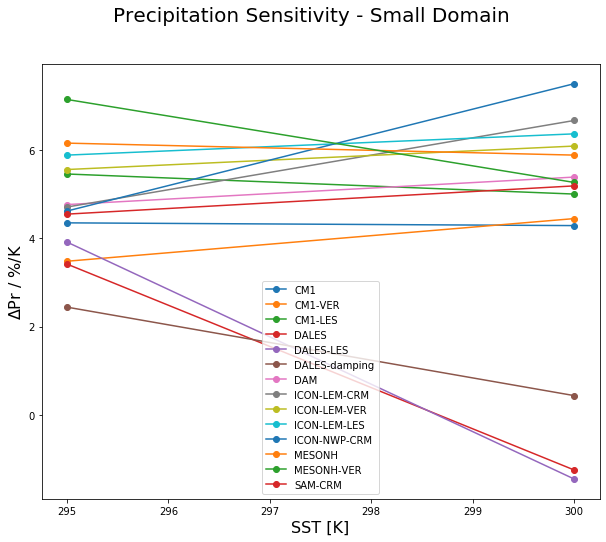

In [5]:
# percentagewise increase of precipitation per Kelvin at 295, 300K
var = 'Precip.'
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
for i,model in enumerate(ds['Model'][0].values):
    sensitivity_295 = (ds[var].sel(tas=300)[i].values / ds[var].sel(tas=295)[i].values -1)*100/5
    sensitivity_300 = (ds[var].sel(tas=305)[i].values / ds[var].sel(tas=300)[i].values -1)*100/5
    Temperatures = [295,300]
    Sensitivities = [sensitivity_295,sensitivity_300]
    axs.plot(Temperatures,Sensitivities,'o-',label=model)#,color=cdict[model])
axs.legend()
axs.set_ylabel(r'$\Delta$Pr / %/K',fontsize=16)
axs.set_xlabel(r'SST [K]',fontsize=16)
plt.suptitle('Precipitation Sensitivity - Small Domain',fontsize = 20)
#axs.set_xlim(293,305)

Text(0.5, 0.98, 'R_NET Sensitivity')

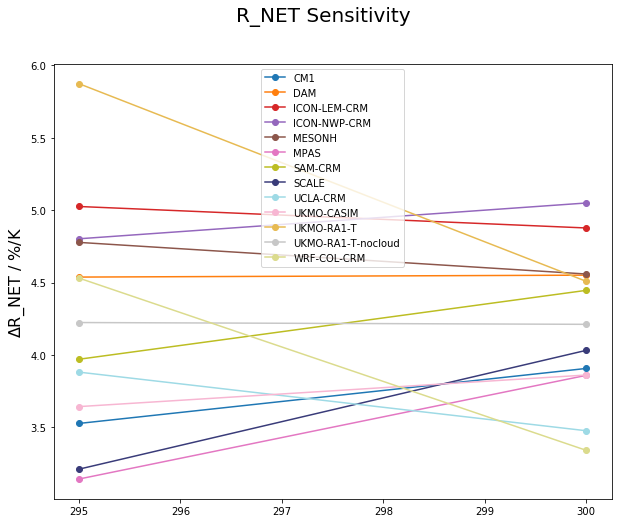

In [31]:
# percentage wise response per Kelvin of atmospheric cooling at 295, 300K
var = 'R_NET'
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
for i,model in enumerate(ds['Model'][0].values):
    sensitivity_295 = (ds[var].sel(tas=300)[i].values / ds[var].sel(tas=295)[i].values -1)*100/5
    sensitivity_300 = (ds[var].sel(tas=305)[i].values / ds[var].sel(tas=300)[i].values -1)*100/5
    Temperatures = [295,300]
    Sensitivities = [sensitivity_295,sensitivity_300]
    axs.plot(Temperatures,Sensitivities,'o-',label=model,color=cdict[model])
axs.legend()
axs.set_ylabel(r'$\Delta$R_NET / %/K',fontsize=16)
plt.suptitle('R_NET Sensitivity',fontsize = 20)

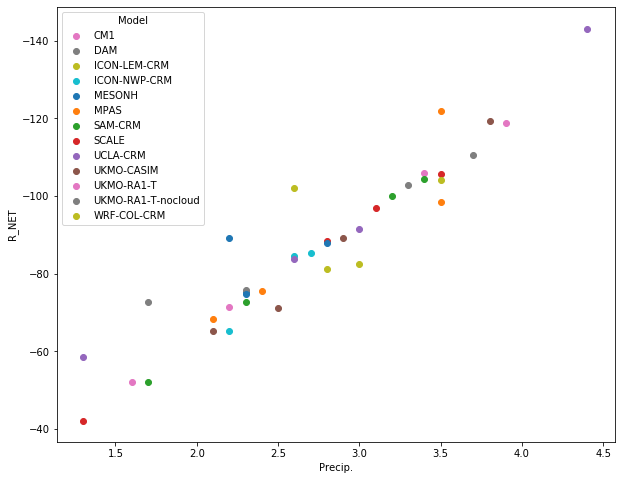

In [32]:
# precipitation vs atmospheric cooling
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
for tas in temps:
    ds.sel(tas=tas).plot.scatter(x='Precip.',y='R_NET',ax=axs,hue = 'Model')
axs.invert_yaxis()

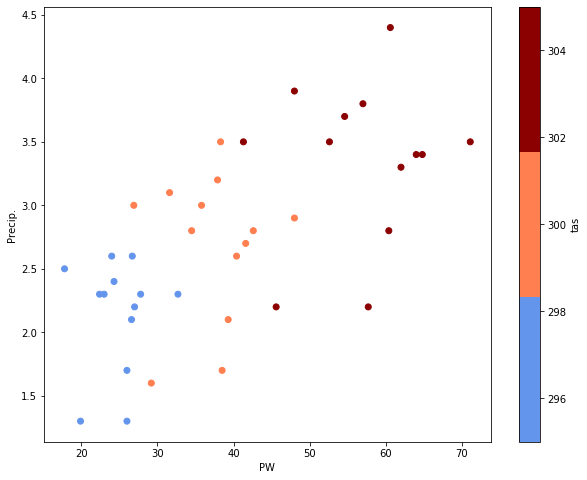

In [34]:
from matplotlib.colors import ListedColormap
custom_colors = ['cornflowerblue', 'coral', 'darkred']  # red, blue, green
cmap = ListedColormap(custom_colors)

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
ds.plot.scatter(x='PW',y='Precip.',ax=axs,hue='tas',cmap=cmap)
#axs.invert_yaxis()

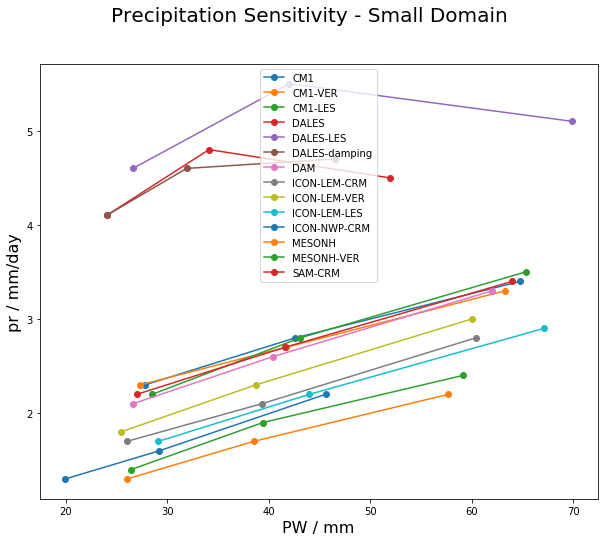

In [14]:
#
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
def remove_nans(arr):
    return arr.flatten()[~np.isnan(arr.flatten())]
for i,model in enumerate(ds['Model'][0].values):
    pr = ds.where(ds.Model == model)['Precip.'].values
    PW = ds.where(ds.Model == model)['PW'].values
    axs.plot(remove_nans(PW),remove_nans(pr),'-o',label=model)#,color=cdict[model])
axs.set_ylabel('pr / mm/day',fontsize=16)
axs.set_xlabel('PW / mm',fontsize=16)
plt.suptitle('Precipitation Sensitivity - Small Domain',fontsize = 20)
axs.legend()

Text(0.5, 0.98, 'Pr increase per PW increase')

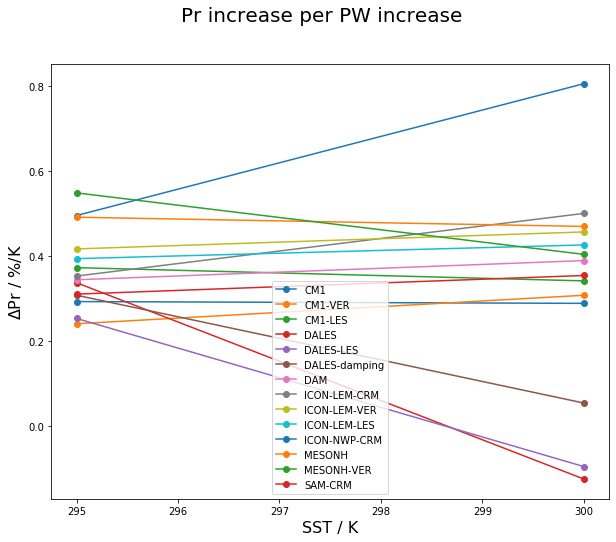

In [16]:
# The slopes look pretty similar. Therefore, what is the increse in precipitation per increase in unit of water vapor?

var = 'Precip.'
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
for i,model in enumerate(ds['Model'][0].values):
    sensitivity_295 = (ds[var].sel(tas=300)[i].values / ds[var].sel(tas=295)[i].values -1)*100/5
    sensitivity_300 = (ds[var].sel(tas=305)[i].values / ds[var].sel(tas=300)[i].values -1)*100/5
    dPW_295 = (ds['PW'].sel(tas=300)[i] - ds['PW'].sel(tas=295)[i]).values
    dPW_300 = (ds['PW'].sel(tas=305)[i] - ds['PW'].sel(tas=300)[i]).values
    temps = [295,300]
    Sensitivities = [sensitivity_295/dPW_295,sensitivity_300/dPW_295]
    axs.plot(temps,Sensitivities,'o-',label=model)#,color=cdict[model])
axs.legend()
axs.set_ylabel(r'$\Delta$Pr / %/K',fontsize=16)
axs.set_xlabel('SST / K' ,fontsize=16)
#axs.set_xlim([7,14])
plt.suptitle('Pr increase per PW increase',fontsize = 20)

## Let's import the 1-D Data for the cloud fraction

In [111]:
import os
files = os.listdir('RCE_small')
files = [f for f in files if f.endswith('.nc')]
files.sort()

ds_list = []
temps = [295,300,305]
for i,t in enumerate(temps):
    filtered = [f for f in files if str(t) in f and 'cfv1-cfv2' in f]
    for f in filtered:
        name = f.split('_')[0]
        df_filtered = xr.open_dataset('RCE_small/'+f)
        df_filtered['tas'] = t
        ds_list.append(df_filtered)
ds_1D = xr.concat(ds_list,dim='tas')

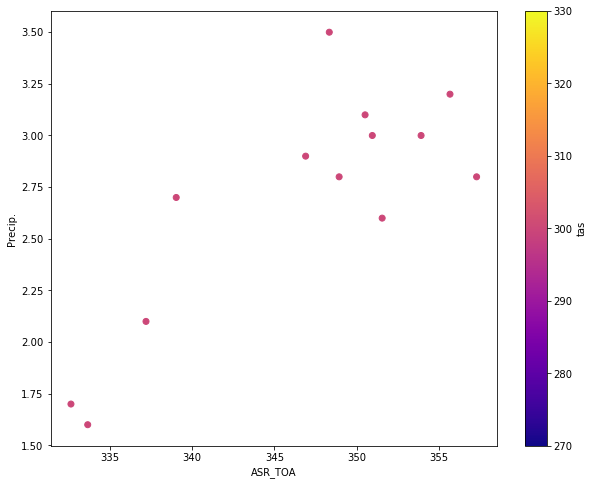

In [64]:
#if the slopes of dpr/dPW are similar across the models, what determines the difference in Water vapor increase?

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
ds.sel(tas=300).plot.scatter(x='ASR_TOA',y='Precip.',ax=axs,hue='tas',cmap='plasma')

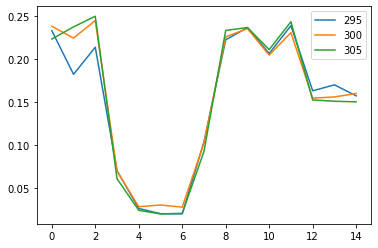

In [104]:
#max cloud fractions across SSTs
for t in temps:
    plt.plot(ds_1D.sel(tas=t).cfv2_avg.where(ds_1D.zg_avg > 3).max(dim='zg_avg').values,label=str(t))
plt.legend()

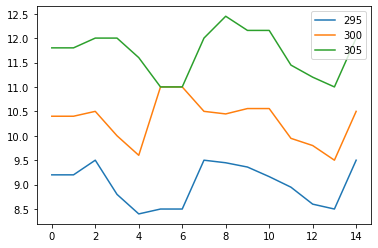

In [103]:
# max cloud fraction height across SSTs
for t in temps:
    plt.plot(ds_1D.zg_avg[ds_1D.sel(tas=t).cfv2_avg.where(ds_1D.zg_avg > 3).argmax(dim='zg_avg')].values,label=str(t))
plt.legend()

TypeError: unsupported format string passed to numpy.ndarray.__format__

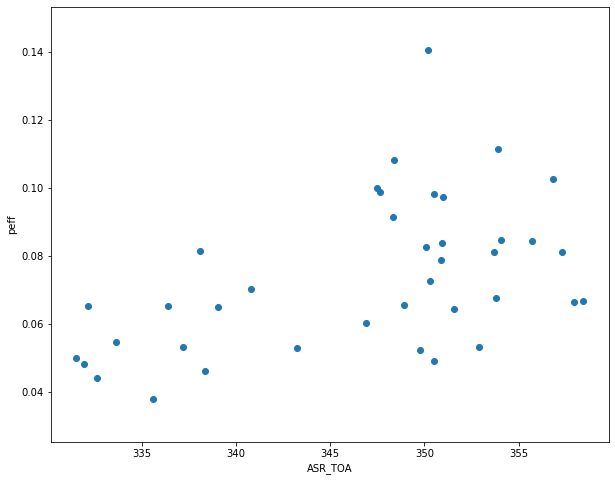

In [14]:
# precipitation efficiency vs variable of choice to check for correlations
from xarray import DataArray
ds['peff'] = ds['Precip.']/ds['PW']
var = 'ASR_TOA'

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
ds.plot.scatter(x=var,y='peff',ax=axs)

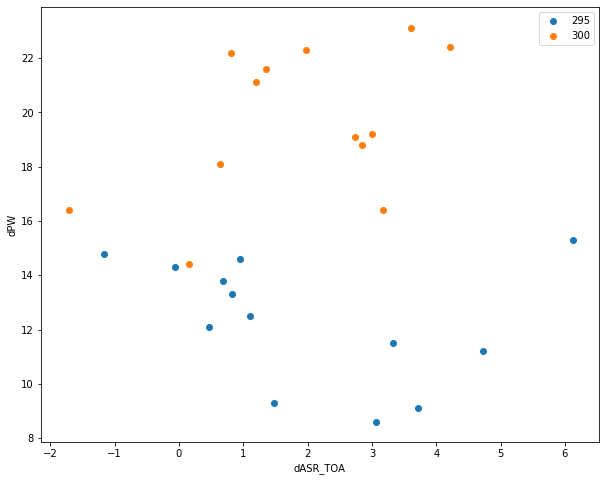

In [41]:
# check for variables that vary coinciding with the integrated water path PW
dPW1 = ds.PW.sel(tas=300) - ds.PW.sel(tas=295)
dPW2 = ds.PW.sel(tas=305) - ds.PW.sel(tas=300)
var = 'ASR_TOA'

dvar1 = ds[var].sel(tas=300) - ds[var].sel(tas=295)
dvar2 = ds[var].sel(tas=305) - ds[var].sel(tas=300)

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
#corr_coef = float(np.correlate(ds['peff'].values.flatten(),ds[var].values.flatten()))
axs.scatter(dvar1,dPW1,label = '295')
axs.scatter(dvar2,dPW2,label = '300')
axs.set_ylabel('dPW')
axs.set_xlabel('d'+var)
axs.legend()
#axs.text(0.05, 0.95, f'Correlation: {corr_coef:.2f}', transform=axs.transAxes, fontsize=12,
 #        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))

ValueError: x and y must be the same size

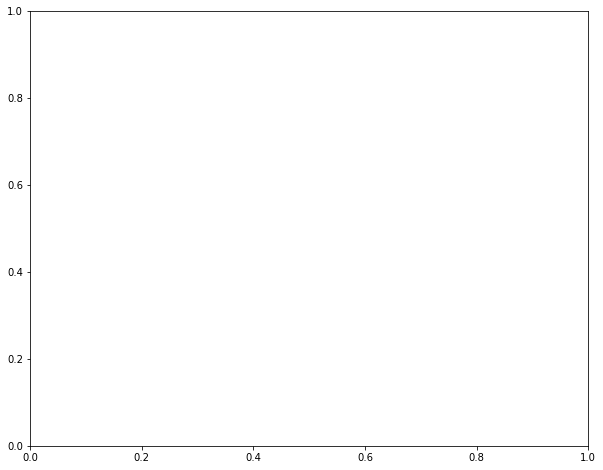

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
for i,model in enumerate(ds['Model'][0].values):
    df= ds.where(ds.Model == model).sel(tas=300)
    dRAD = -(df.ASR_TOA -df.LHF - df.SHF - df.OLR)
    dPR = (ds['Precip.'] - ds['Precip.'].mean())
    #fnet=ds.sel(tas=300).F_NET
    axs.scatter(dRAD,dPR,label=model)
#axs.scatter(dvar2,dPW2,label = '300')
axs.set_ylabel('dPR')
axs.set_xlabel('dRAD')
axs.legend()
#axs.text(0.05, 0.95, f'Correlation: {corr_coef:.2f}', transform=axs.transAxes, fontsize=12,
 #        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))

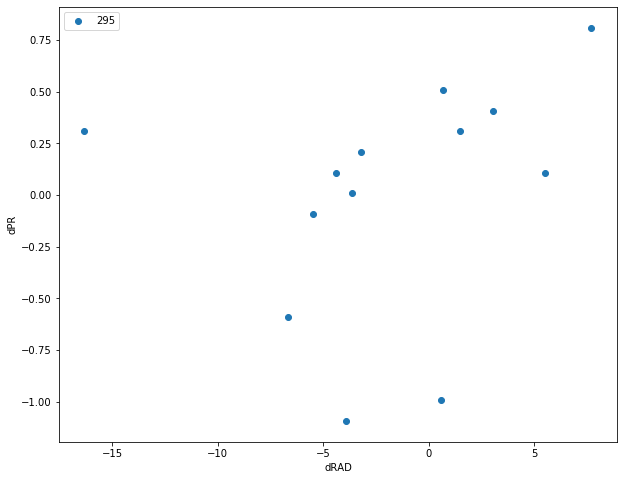

In [56]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))

dRAD = -(ds.R_NET+ds.SHF+ds.LHF).sel(tas=300)
dPR = ds['Precip.'].sel(tas=300) - ds['Precip.'].sel(tas=300).mean()
fnet=ds.sel(tas=300).F_NET
axs.scatter(dRAD,dPR,label = '295')
#axs.scatter(dvar2,dPW2,label = '300')
axs.set_ylabel('dPR')
axs.set_xlabel('dRAD')
axs.legend()
#axs.text(0.05, 0.95, f'Correlation: {corr_coef:.2f}', transform=axs.transAxes, fontsize=12,
 #        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))

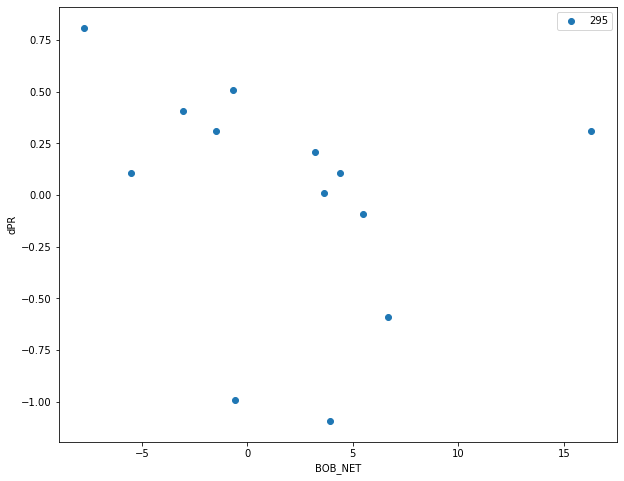

In [51]:
ds['BOB_NET'] = ds.R_NET+ds.SHF+ds.LHF

fig, axs = plt.subplots(1, 1, figsize=(10, 8))

dPR = ds['Precip.'].sel(tas=300) - ds['Precip.'].sel(tas=300).mean()
dBOB = ds['BOB_NET'].sel(tas=300)
#fnet=ds.sel(tas=300).F_NET
axs.scatter(dBOB,dPR,label = '295')
#axs.scatter(dvar2,dPW2,label = '300')
axs.set_ylabel('dPR')
axs.set_xlabel('BOB_NET')
axs.legend()

In [ ]:
ds['BOB_NET'] = ds.R_NET+ds.SHF+ds.LHF

fig, axs = plt.subplots(1, 1, figsize=(10, 8))

dPR = ds['Precip.'].sel(tas=300) - ds['Precip.'].sel(tas=300).mean()
dBOB = ds['BOB_NET'].sel(tas=300)
#fnet=ds.sel(tas=300).F_NET
axs.scatter(dBOB,dPR,label = '295')
#axs.scatter(dvar2,dPW2,label = '300')
axs.set_ylabel('dPR')
axs.set_xlabel('BOB_NET')
axs.legend()

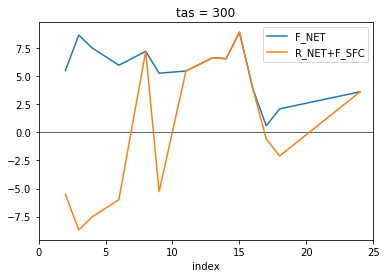

In [28]:
ds.sel(tas=300).F_NET.plot(label='F_NET')
(ds.R_NET+ds.SHF+ds.LHF).sel(tas=300).plot(label='R_NET+F_SFC')
plt.hlines(0,-3,27,linewidth=0.6)
plt.xlim([0,25])
pl.ylabel('Imbalance / W/m^2')
plt.xlabel('Models')
plt.legend()

In [30]:
ds

<xarray.Dataset>
Dimensions:     (index: 13, tas: 3)
Coordinates:
  * index       (index) int64 2 11 13 16 17 23 24 27 28 30 32 33 34
  * tas         (tas) int64 295 300 305
Data variables:
    Unnamed: 0  (tas, index) float64 2.0 11.0 13.0 16.0 ... 30.0 32.0 33.0 34.0
    Unnamed: 1  (tas, index) object 'E' 'E' 'E' 'E' 'E' ... 'E' 'E' 'E' 'E' 'E'
    Model       (tas, index) object 'CM1' 'DAM' ... 'WRF-COL-CRM'
    F_NET       (tas, index) float64 -3.89 4.57 4.53 3.91 ... 2.19 1.72 4.33
    R_TOA       (tas, index) float64 110.8 109.7 118.4 ... 79.29 92.01 107.2
    Q_OCN       (tas, index) float64 114.6 105.1 113.8 ... 81.48 93.73 102.8
    R_NET       (tas, index) float64 -75.23 -68.27 -52.18 ... -110.7 -104.2
    OLR         (tas, index) float64 239.3 241.2 218.0 ... 274.4 261.8 243.3
    ASR_TOA     (tas, index) float64 350.1 350.9 336.4 ... 353.7 353.8 350.5
    LHF         (tas, index) float64 62.62 61.17 47.77 ... 112.2 105.1 102.1
    SHF         (tas, index) float64 8.73 11.67 8.93 8.31 ... 5.9 4.26 3.84 6.43
    PW          (tas, index) float64 27.8 26.6 26.0 19.9 ... 57.0 48.0 54.6 71.1
    Precip.     (tas, index) float64 2.3 2.1 1.7 1.3 1.3 ... 4.4 3.8 3.9 3.7 3.5
    LWP         (tas, index) float64 0.04 0.023 0.032 0.02 ... 0.008 0.005 0.016
    IWP         (tas, index) float64 0.111 0.014 0.021 ... 0.063 0.055 0.009
    clwvi_avg   (tas, index) float64 0.151 0.037 0.053 ... 0.071 0.06 0.025
    Lapse Rate  (tas, index) float64 -7.97 -7.89 -7.65 ... -6.74 -6.99 -6.73

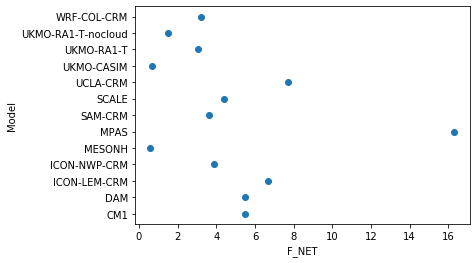

In [41]:
ds.sel(tas=300).plot.scatter(x='F_NET',y='Model')